In [9]:
import wbdata 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import Linear_Regression
import statsmodels.api as sm

In [2]:
indicators = {"NY.GDP.MKTP.CD": "GDP",
              "NE.CON.PRVT.ZS": "Households and NPISHs Final consumption expenditure (% of GDP)",
              "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
              "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
              "NE.IMP.GNFS.ZS": "Imports of goods and services (% of GDP)" }

data_dates = (datetime.datetime(1900, 1, 1), datetime.datetime(2020, 1, 1))

#Create dataframe
data = wbdata.get_dataframe(indicators, 
                            country=('TUR'), 
                            data_date=data_dates, 
                            convert_date=False, keep_levels=True)

In [100]:
df = data.to_csv('wbdata.csv')
Y = data[data.columns[[1]]]
X = data[data.columns[[2,3,4]]]

In [101]:
Y

Households and NPISHs Final consumption expenditure (% of GDP)
country date                                                                
Turkey  2020                                          56.746267             
        2019                                          56.873393             
        2018                                          56.168663             
        2017                                          58.608851             
        2016                                          59.408351             
...                                                         ...             
        1964                                          53.578529             
        1963                                          54.935622             
        1962                                          55.417186             
        1961                                          56.328234             
        1960                                          56.387665             

[61 rows x 1 columns]

In [109]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [113]:
merge_col = [X,Y]
merge_col
result = pd.concat(merge_col,axis=1, keys=["x_values","targets"])
result = result.dropna()
X = result['x_values']
Y = result['targets']

In [114]:
cormat = X.corr()
round(cormat,2)

,0,1,2
0,1.00,0.62,0.65
1,0.62,1.00,0.95
2,0.65,0.95,1.00


In [122]:
X = X[[0,1]]#since correlation coef between 1 and 2(import and export good and services) : 0.95 ,thats why I eliminated import one.  

In [116]:
beta, standard_error, confindence_interval, y_prediction = Linear_Regression.LinearRegression(X,Y)

Y shape(50, 1)
n:50 and k:2
intercept shape(50, 1)
X shape(50, 3)
X_ shape(3, 3)
β1 shape(3, 50)
β shape(3, 1)
y_hat shape(50, 1)
e shape(50, 1)
σ_square shape(1, 1)
standart_error shape(3, 1)
t-critical value:
2.0128955952945886


In [149]:
results_beta = pd.DataFrame(beta)
results_std = pd.DataFrame(standard_error)
results_lower = pd.DataFrame(confidence_interval[0])
results_upper = pd.DataFrame(confidence_interval[1])
results_regression = pd.concat([results_beta,results_std,results_lower,results_upper],axis=1,keys = ['coefficients','standard error','lower bound','upper bound'])
results_regression.dropna()

,coefficients,standard error,lower bound,upper bound
,0,0,0,0
0,58.295464,1.451748,2.979502e+11,1.467416e+12
1,-1.840258,0.910352,-3.057217e+10,-1.039636e+10
2,0.307577,0.096352,5.333258e+10,1.888286e+11


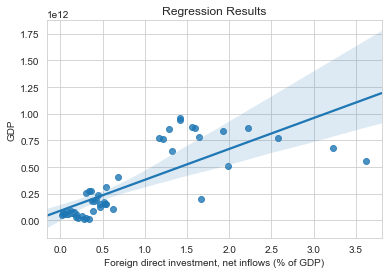

In [121]:
import seaborn as sns

fig = sns.regplot(x=data.columns[2], y="GDP", data=data)
sns.set_style("whitegrid")
plt.title("Regression Results")
plt.show()

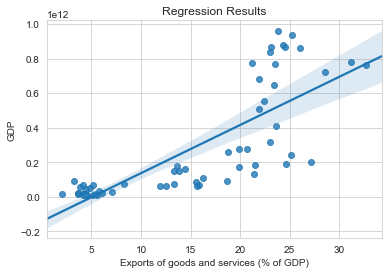

In [120]:
fig = sns.regplot(x=data.columns[3], y="GDP", data=data)
sns.set_style("whitegrid")
plt.title("Regression Results")
plt.show()

In [126]:
X = sm.add_constant(X)
OLS_benchmark = sm.OLS(Y,X).fit()
print(OLS_benchmark.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     5.097
Date:                Sun, 12 Dec 2021   Prob (F-statistic):            0.00992
Time:                        12:29:45   Log-Likelihood:                -142.04
No. Observations:                  50   AIC:                             290.1
Df Residuals:                      47   BIC:                             295.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2955      1.452     40.155      0.0